# Primer parte del proyecto (Solamente es para obtener valores)


### Creacion del conjunto de datos

In [45]:
import pandas as pd
import numpy as np

def generate_dataset1():

    np.random.seed(42)

    media_a = 120  
    desviacion_a = 10  

    
    media_b = 110  
    desviacion_b = 12  

    n_observaciones = 100

    tiempos_a = np.random.normal(loc=media_a, scale=desviacion_a, size=n_observaciones)
    tiempos_b = np.random.normal(loc=media_b, scale=desviacion_b, size=n_observaciones)

    df = pd.DataFrame({
        'Línea A (s)': np.round(tiempos_a, 2),
        'Línea B (s)': np.round(tiempos_b, 2)
    })


    return df.to_csv('../media/dataset_punto1.csv', index=False)


generate_dataset1()

dataset_general = pd.read_csv('../assets/dataset_punto1.csv')

dataset_general


,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


### Obtener MTC (Medidas de tendencia de las columnas)




In [46]:
import pandas as pd
import numpy as np

def get_mtc(dataset):
    
    columns = ['Linea A (Media)','Linea B (Media)','Linea A (mediana)','Linea B (mediana)','Linea A (Moda)','Linea B (Moda)']
    
    data = []

    data.append(dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].mean())
    data.append(dataset['Línea A (s)'].median())
    data.append(dataset['Línea B (s)'].median())
    data.append(dataset['Línea A (s)'].mode()[0])
    data.append(dataset['Línea B (s)'].mode()[0])


    data = np.array(data).reshape(1,-1) #Redimensionar para quedar en el mismo tamaño de las columnas
    
    dataset = pd.DataFrame(data=data, columns=columns)

    return dataset


dataset_mtc = get_mtc(dataset_general)

dataset_mtc

,Linea A (Media),Linea B (Media),Linea A (mediana),Linea B (mediana),Linea A (Moda),Linea B (Moda)
0,118.9616,110.2674,118.73,111.01,117.66,115.68


In [47]:
def get_dispersion_metrics(dataset):

    columns = ['Línea A (STD)','Línea B (STD)','Línea A (VAR)','Línea B (VAR)','Línea A (Range)','Línea B (Range)','Línea A (Cof_Var)','Línea B (Cof_Var)',]

    data = []

    data.append(dataset['Línea A (s)'].std())
    data.append(dataset['Línea B (s)'].std())
    data.append(dataset['Línea A (s)'].var())
    data.append(dataset['Línea B (s)'].var())
    data.append(dataset['Línea A (s)'].max() - dataset['Línea A (s)'].min())
    data.append(dataset['Línea B (s)'].max() - dataset['Línea B (s)'].min())
    data.append(dataset['Línea A (s)'].std() / dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].std() / dataset['Línea B (s)'].mean())

    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_dispersion = get_dispersion_metrics(dataset_general)

dataset_dispersion

    

,Línea A (STD),Línea B (STD),Línea A (VAR),Línea B (VAR),Línea A (Range),Línea B (Range),Línea A (Cof_Var),Línea B (Cof_Var)
0,9.082117,11.44411,82.484846,130.967656,44.72,55.67,0.076345,0.103785


In [48]:
def get_form_metrics(dataset):
    
    columns = ['Línea A (Asimetria)','Línea B (Asimetria)','Línea A (Curtosis)','Línea B (Curtosis)']

    data = []

    data.append(dataset['Línea A (s)'].skew())
    data.append(dataset['Línea B (s)'].skew())
    data.append(dataset['Línea A (s)'].kurtosis())
    data.append(dataset['Línea B (s)'].kurtosis())

    
    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_form = get_form_metrics(dataset_general)


dataset_form


,Línea A (Asimetria),Línea B (Asimetria),Línea A (Curtosis),Línea B (Curtosis)
0,-0.178085,0.3869,-0.100912,0.031035


### Graficos : Histogramas,Boxplot,Tallos


In [49]:
dataset_general

,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


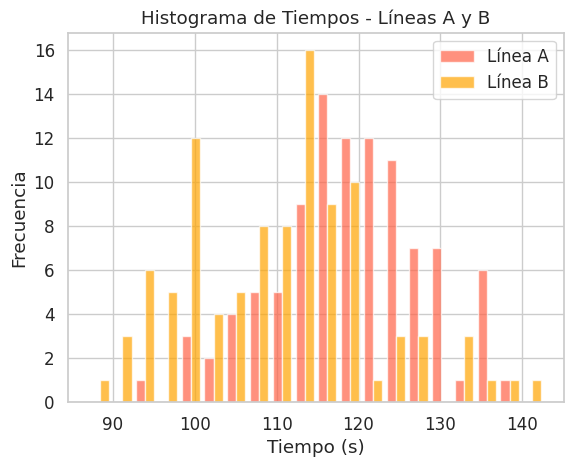

In [50]:
import matplotlib.pyplot as plt 

import numpy as np

fig, ax_hist = plt.subplots()

def create_hist():
    #Creamos el diagrama el historigrama
    ax_hist.hist([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']], #El primer argumento es la lista de los 2
                bins=20, alpha=0.7, label=['Línea A', 'Línea B'],
                color=['tomato', 'orange']) #Aqui lo mismo

    # Etiquetas y texto
    ax_hist.set_xlabel('Tiempo (s)')
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.set_title('Histograma de Tiempos - Líneas A y B')
    ax_hist.legend()
    plt.show()


create_hist()

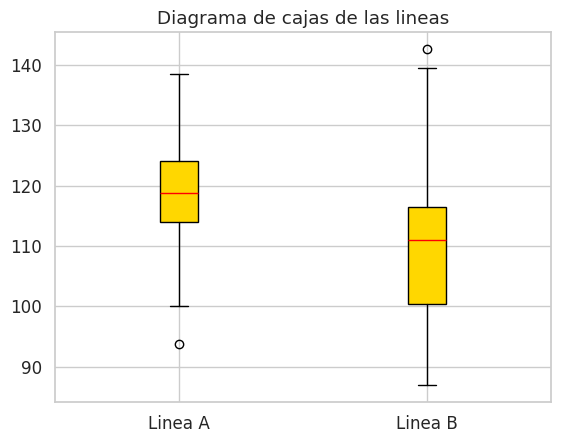

In [51]:
fig, ax_box_plot = plt.subplots()

def create_box_plots():
    #Creamos el boxplot
    ax_box_plot.boxplot([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']],
                        vert=True,
                        tick_labels=['Linea A', 'Linea B'],  #Lista simple ,Usar en vez de labels tick_labels es mas nuevo
                        boxprops=dict(facecolor='gold'),
                        medianprops=dict(color='red'),
                        patch_artist=True)  

    ax_box_plot.set_title('Diagrama de cajas de las lineas')

    plt.show()

create_box_plots()



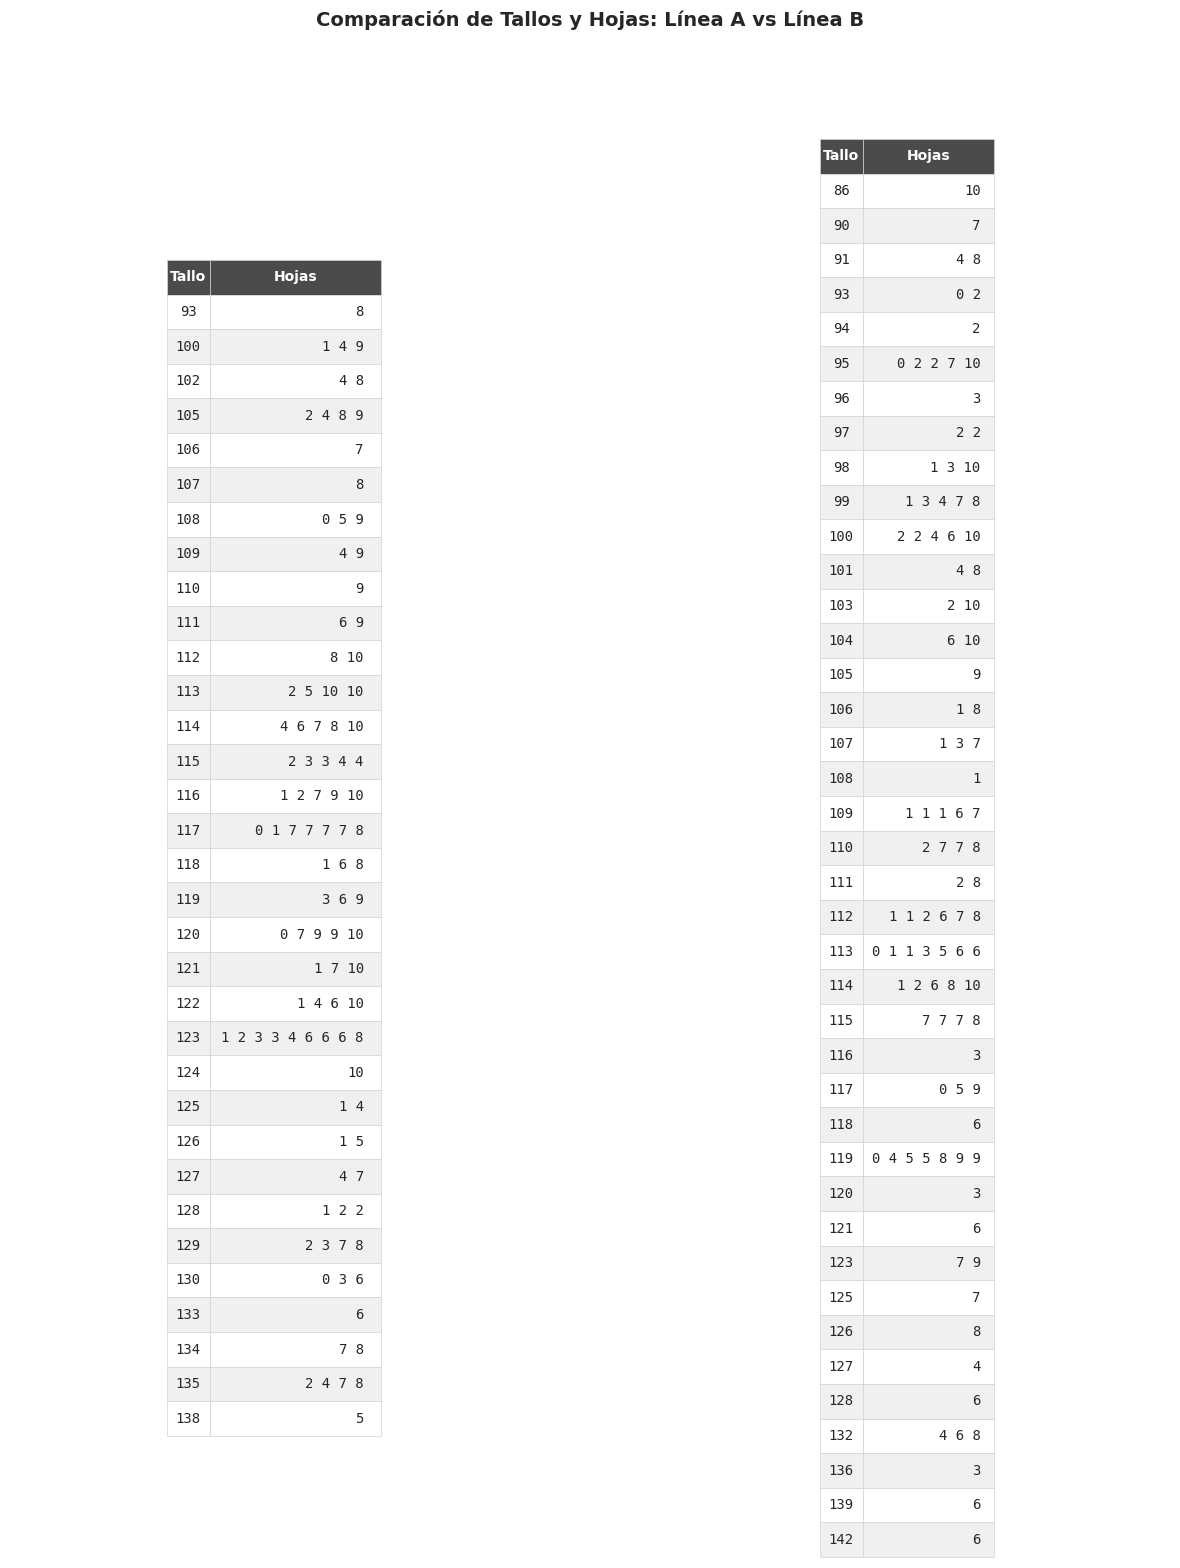

In [52]:
import matplotlib.pyplot as plt

def create_stem_comparison_tables(dataset):
    # 1) Construir diccionarios {tallo: [hojas]} para A y B
    def stem_dict(series):
        d = {}
        for t in series:
            tallo = int(t)
            hoja = int(round((t - tallo) * 10))
            d.setdefault(tallo, []).append(hoja)
        for hojas in d.values():
            hojas.sort()
        return d

    stemA = stem_dict(dataset['Línea A (s)'])
    stemB = stem_dict(dataset['Línea B (s)'])
    tallosA = sorted(stemA.keys())
    tallosB = sorted(stemB.keys())

    # 2) Preparar datos para cada tabla
    dataA = [[t, ' '.join(map(str, stemA.get(t, []))) if stemA.get(t, []) else '-'] for t in tallosA]
    dataB = [[t, ' '.join(map(str, stemB.get(t, []))) if stemB.get(t, []) else '-'] for t in tallosB]

    # 3) Configurar la figura con dos subgráficos
    num_rows = max(len(tallosA), len(tallosB))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, max(3, num_rows * 0.4)), gridspec_kw={'width_ratios': [1, 1]})
    fig.suptitle('Comparación de Tallos y Hojas: Línea A vs Línea B', fontsize=14, fontweight='bold', y=0.98)

    # 4) Tabla para Línea A
    ax1.axis('off')
    tblA = ax1.table(
        cellText=dataA,
        colLabels=['Tallo', 'Hojas'],
        loc='center',
        cellLoc='center',
        colLoc='center',
    )
    tblA.auto_set_font_size(False)
    tblA.set_fontsize(10)
    tblA.scale(1.2, 1.8)
    tblA.auto_set_column_width([0, 1])
    for (row, col), cell in tblA.get_celld().items():
        if row == 0:
            cell.set_facecolor('#4B4B4B')
            cell.set_text_props(color='white', fontweight='bold')
        else:
            cell.set_facecolor('#F0F0F0' if row % 2 == 0 else 'white')
            if col == 1:  # Columna de hojas
                cell.set_text_props(fontfamily='monospace', ha='right')
            else:  # Columna de tallos
                cell.set_text_props(fontfamily='monospace', ha='center')
        cell.set_edgecolor('#D3D3D3')
        cell.set_linewidth(0.5)

    # 5) Tabla para Línea B
    ax2.axis('off')
    tblB = ax2.table(
        cellText=dataB,
        colLabels=['Tallo', 'Hojas'],
        loc='center',
        cellLoc='center',
        colLoc='center',
    )
    tblB.auto_set_font_size(False)
    tblB.set_fontsize(10)
    tblB.scale(1.2, 1.8)
    tblB.auto_set_column_width([0, 1])
    for (row, col), cell in tblB.get_celld().items():
        if row == 0:
            cell.set_facecolor('#4B4B4B')
            cell.set_text_props(color='white', fontweight='bold')
        else:
            cell.set_facecolor('#F0F0F0' if row % 2 == 0 else 'white')
            if col == 1:  # Columna de hojas
                cell.set_text_props(fontfamily='monospace', ha='right')
            else:  # Columna de tallos
                cell.set_text_props(fontfamily='monospace', ha='center')
        cell.set_edgecolor('#D3D3D3')
        cell.set_linewidth(0.5)

    # 6) Ajustar el diseño
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, wspace=0.2)
    plt.savefig('stem_comparison_tables.png')

# Úsalo así:
create_stem_comparison_tables(dataset_general)


P-values para Línea A:
           Normal   Exponencial   Weibull
Línea A  0.939568  5.823735e-30  0.823595


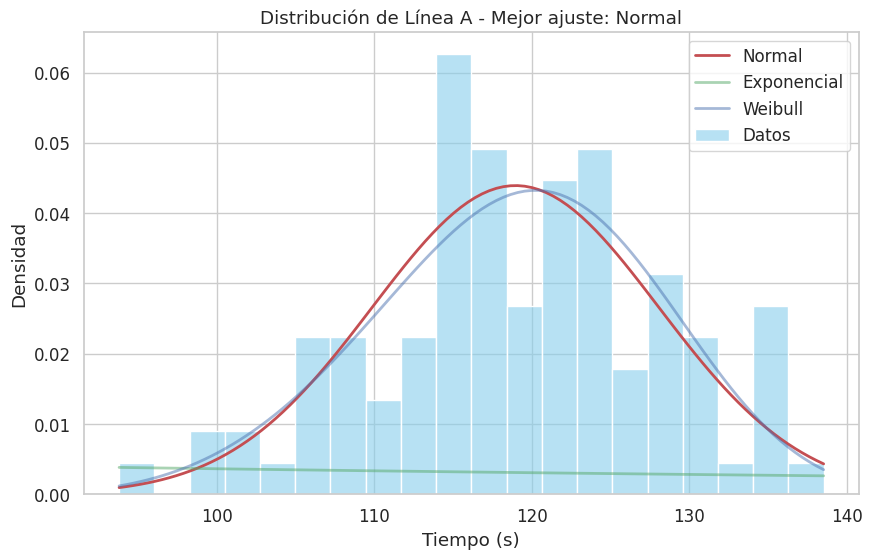


P-values para Línea B:
           Normal   Exponencial   Weibull
Línea B  0.651338  5.113319e-29  0.560145


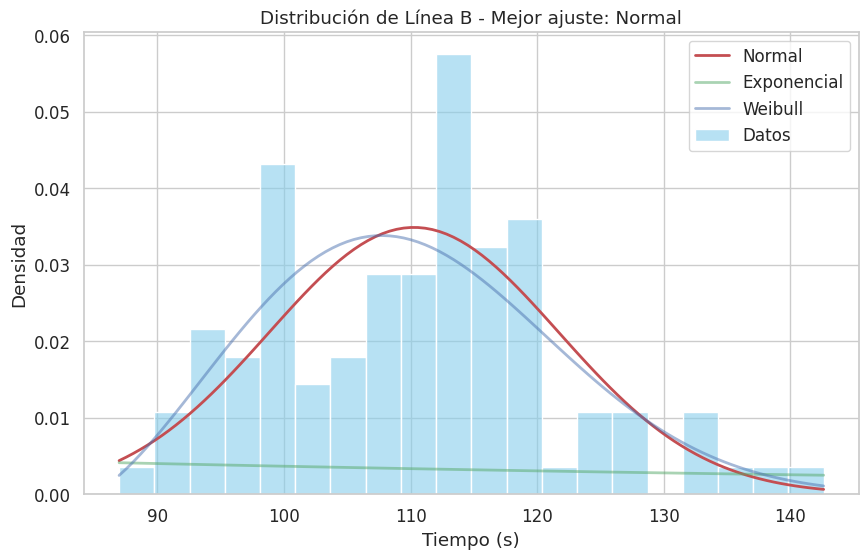


Mejor ajuste Línea A: Normal
Mejor ajuste Línea B: Normal

P-values para Línea A:
           Normal   Exponencial   Weibull
Línea A  0.939568  5.823735e-30  0.823595


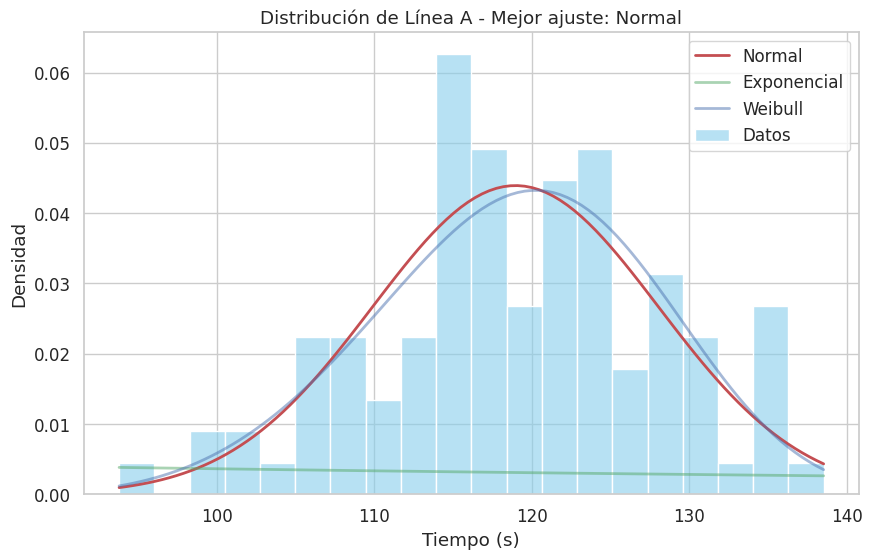


Resultados de Línea A (p-values):
{'Normal': np.float64(0.9395676846290586), 'Exponencial': np.float64(5.823734992485055e-30), 'Weibull': np.float64(0.8235951078697402)}


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurar estilo de seaborn
sns.set(style="whitegrid", font_scale=1.1)

# Cargar datos (asegurarse de que la ruta sea correcta)
dataset_general = pd.read_csv('../media/dataset_punto1.csv')

# -----------------------------------------------------------
def goodness_of_fit(series, nombre='Serie', alpha=0.05):
    """
    Aplica pruebas KS y Anderson-Darling para Normal, Exponencial y Weibull.
    Genera un histograma con las distribuciones ajustadas.
    Devuelve un dict con los p-values y la mejor distribución (mayor p).
    """
    resultados = {}
    
    # --- Normal (usando media y desvío muestrales) -------------
    mu, sigma = series.mean(), series.std(ddof=1)
    ks_norm = stats.kstest(series, 'norm', args=(mu, sigma))
    ad_norm = stats.anderson(series, dist='norm')
    resultados['Normal'] = ks_norm.pvalue
    
    # --- Exponencial (loc=0 forzada) ----------------------------
    loc_exp, scale_exp = stats.expon.fit(series, floc=0)
    ks_exp = stats.kstest(series, 'expon', args=(loc_exp, scale_exp))
    resultados['Exponencial'] = ks_exp.pvalue
    
    # --- Weibull mín (sin fijar loc para mejor ajuste) ----------
    c_w, loc_w, scale_w = stats.weibull_min.fit(series)  # Removido floc=0
    ks_weib = stats.kstest(series, 'weibull_min', args=(c_w, loc_w, scale_w))
    resultados['Weibull'] = ks_weib.pvalue
    
    # Mostrar tabla p-values
    print(f"\nP-values para {nombre}:")
    print(pd.DataFrame(resultados, index=[nombre]))
    
    # Seleccionar la mejor (p más alta y > α)
    mejor = max(resultados, key=resultados.get)
    if resultados[mejor] < alpha:
        mejor = 'Ninguna (todas p < α)'
    
    # --- Generar gráfico ---
    plt.figure(figsize=(10, 6))
    # Histograma de los datos
    sns.histplot(series, bins=20, stat='density', color='skyblue', label='Datos', alpha=0.6)
    
    # Generar puntos para las curvas de las distribuciones
    x = np.linspace(min(series), max(series), 100)
    
    # Normal
    pdf_norm = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf_norm, 'r-', lw=2, label='Normal', alpha=0.5 if mejor != 'Normal' else 1.0)
    
    # Exponencial
    pdf_exp = stats.expon.pdf(x, loc_exp, scale_exp)
    plt.plot(x, pdf_exp, 'g-', lw=2, label='Exponencial', alpha=0.5 if mejor != 'Exponencial' else 1.0)
    
    # Weibull
    pdf_weib = stats.weibull_min.pdf(x, c_w, loc_w, scale_w)
    plt.plot(x, pdf_weib, 'b-', lw=2, label='Weibull', alpha=0.5 if mejor != 'Weibull' else 1.0)
    
    # Configurar el gráfico
    plt.title(f'Distribución de {nombre} - Mejor ajuste: {mejor}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.savefig(f'{nombre.replace(" ", "_")}_dist_fit.png')
    plt.show()
    
    return mejor, resultados

# Ejecutar para Línea A
best_A, dict_A = goodness_of_fit(dataset_general['Línea A (s)'], 'Línea A')

# Ejecutar para Línea B
best_B, dict_B = goodness_of_fit(dataset_general['Línea B (s)'], 'Línea B')

# Imprimir los mejores ajustes
print(f"\nMejor ajuste Línea A: {best_A}")
print(f"Mejor ajuste Línea B: {best_B}")

# Obtener resultados para Línea A (como se solicita en dataset_A[1])
dataset_A = goodness_of_fit(dataset_general['Línea A (s)'], 'Línea A')
print("\nResultados de Línea A (p-values):")
print(dataset_A[1])

           Normal  Exponencial   Weibull
Línea A  0.248841      0.00017  0.010664


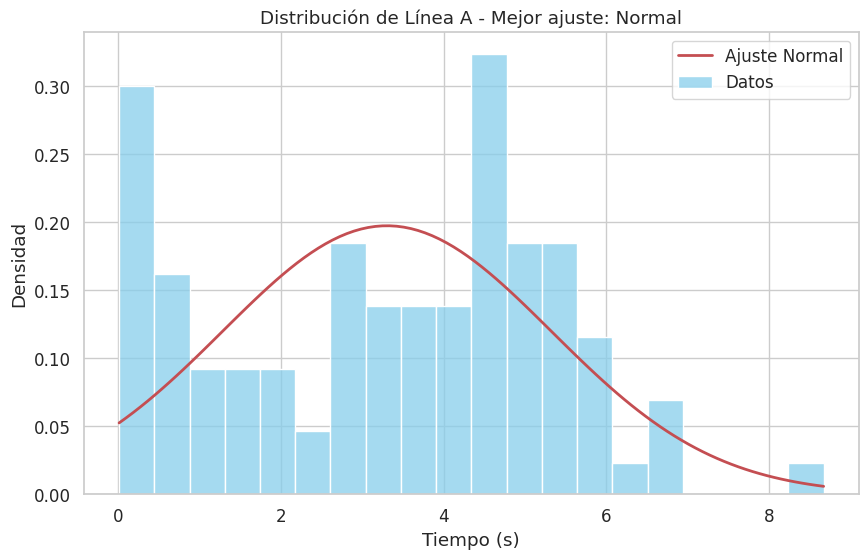

           Normal  Exponencial   Weibull
Línea B  0.322755     0.000029  0.961995


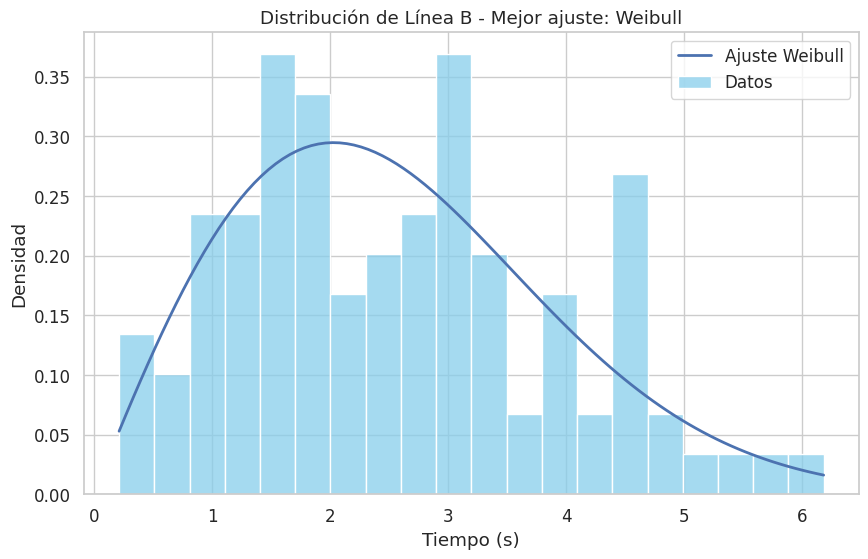


Mejor ajuste Línea A: Normal
Mejor ajuste Línea B: Weibull


In [54]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
sns.set(style="whitegrid", font_scale=1.1)

# Datos de ejemplo (si dataset_general no está definido)
np.random.seed(42)
dataset_general = pd.DataFrame({
    'Línea A (s)': np.concatenate([np.random.normal(5, 1, 50), np.random.exponential(2, 50)]),
    'Línea B (s)': np.random.weibull(2, 100) * 3
})

# -----------------------------------------------------------
def goodness_of_fit(series, nombre='Serie', alpha=0.05):
    """
    Aplica pruebas KS y Anderson-Darling para Normal, Exponencial y Weibull.
    Devuelve un dict con los p-values y la mejor distribución (mayor p).
    Genera un histograma con el mejor ajuste.
    """
    resultados = {}
    
    # --- Normal (usando media y desvío muestrales) -------------
    mu, sigma = series.mean(), series.std(ddof=1)
    ks_norm = stats.kstest(series, 'norm', args=(mu, sigma))
    ad_norm = stats.anderson(series, dist='norm')
    resultados['Normal'] = ks_norm.pvalue
    
    # --- Exponencial (loc=0 forzada) ----------------------------
    loc_exp, scale_exp = stats.expon.fit(series, floc=0)
    ks_exp = stats.kstest(series, 'expon', args=(loc_exp, scale_exp))
    resultados['Exponencial'] = ks_exp.pvalue
    
    # --- Weibull mín -------------------------------------------
    c_w, loc_w, scale_w = stats.weibull_min.fit(series, floc=0)
    ks_weib = stats.kstest(series, 'weibull_min', args=(c_w, loc_w, scale_w))
    resultados['Weibull'] = ks_weib.pvalue
    
    # Mostrar tabla p-values
    print(pd.DataFrame(resultados, index=[nombre]))
    
    # Seleccionar la mejor (p más alta y > α)
    mejor = max(resultados, key=resultados.get)
    if all(p < alpha for p in resultados.values()):
        mejor = 'Ninguna (todas p < α)'
    
    # Generar histograma con el mejor ajuste
    plt.figure(figsize=(10, 6))
    sns.histplot(series, bins=20, stat='density', color='skyblue', label='Datos')
    
    # Ajustar y graficar la mejor distribución
    x = np.linspace(min(series), max(series), 100)
    if mejor == 'Normal':
        plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Ajuste Normal')
    elif mejor == 'Exponencial':
        plt.plot(x, stats.expon.pdf(x, loc_exp, scale_exp), 'g-', lw=2, label='Ajuste Exponencial')
    elif mejor == 'Weibull':
        plt.plot(x, stats.weibull_min.pdf(x, c_w, loc_w, scale_w), 'b-', lw=2, label='Ajuste Weibull')
    else:  # Ninguna (todas p < α)
        plt.plot([], [], ' ', label='Ningún ajuste válido')
    
    plt.title(f'Distribución de {nombre} - Mejor ajuste: {mejor}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.savefig(f'{nombre.replace(" ", "_")}_fit.png')
    plt.show()
    
    return mejor, resultados

# Ejecutar para ambas líneas
best_A, _ = goodness_of_fit(dataset_general['Línea A (s)'], 'Línea A')
best_B, _ = goodness_of_fit(dataset_general['Línea B (s)'], 'Línea B')

print(f"\nMejor ajuste Línea A: {best_A}")
print(f"Mejor ajuste Línea B: {best_B}")

In [55]:
# Parámetros empíricos
mu_A, sigma_A = dataset_general['Línea A (s)'].mean(), dataset_general['Línea A (s)'].std(ddof=1)
mu_B, sigma_B = dataset_general['Línea B (s)'].mean(), dataset_general['Línea B (s)'].std(ddof=1)

# c‑1) Probabilidad de exceder 120 s
p_A = 1 - stats.norm.cdf(120, loc=mu_A, scale=sigma_A)
p_B = 1 - stats.norm.cdf(120, loc=mu_B, scale=sigma_B)

# c‑2) Tiempo estándar para cumplir 90 %
t90_A = stats.norm.ppf(0.90, loc=mu_A, scale=sigma_A)
t90_B = stats.norm.ppf(0.90, loc=mu_B, scale=sigma_B)

print(f"Línea A →  P(T>120) = {p_A:.2%}   |   t_90 = {t90_A:.2f} s")
print(f"Línea B →  P(T>120) = {p_B:.2%}   |   t_90 = {t90_B:.2f} s")


Línea A →  P(T>120) = 0.00%   |   t_90 = 5.89 s
Línea B →  P(T>120) = 0.00%   |   t_90 = 4.30 s


In [56]:
def ic95_media(series):
    n = len(series)
    mu = series.mean()
    s  = series.std(ddof=1)
    ic = stats.t.interval(0.95, df=n-1, loc=mu, scale=s/np.sqrt(n))
    return ic

ic_A = ic95_media(dataset_general['Línea A (s)'])
ic_B = ic95_media(dataset_general['Línea B (s)'])

print(f"IC 95 % μ_A: {ic_A[0]:.2f} – {ic_A[1]:.2f}")
print(f"IC 95 % μ_B: {ic_B[0]:.2f} – {ic_B[1]:.2f}")


IC 95 % μ_A: 2.90 – 3.70
IC 95 % μ_B: 2.30 – 2.84


In [57]:
t_stat, p_val = stats.ttest_ind(dataset_general['Línea A (s)'],
                                dataset_general['Línea B (s)'],
                                equal_var=False)    # Welch
print(f"t = {t_stat:.3f}   |   p = {p_val:.4f}")


t = 3.023   |   p = 0.0029


### Verificación de la distribución con código actualizado

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Usar el dataset_general ya cargado anteriormente

# -----------------------------------------------------------
def goodness_of_fit(series, nombre='Serie', alpha=0.05):
    """
    Aplica pruebas KS para Normal, Exponencial y Weibull.
    Devuelve (mejor, resultados_dict) donde:
      - mejor: nombre de la distribución con p más alta (o 'Ninguna...')
      - resultados_dict: {'Normal': p1, 'Exponencial': p2, 'Weibull': p3}
    """
    resultados = {}
    
    # Normal
    mu, sigma = series.mean(), series.std(ddof=1)
    resultados['Normal'] = stats.kstest(series, 'norm', args=(mu, sigma)).pvalue
    
    # Exponencial (floc=0)
    loc_exp, scale_exp = stats.expon.fit(series, floc=0)
    resultados['Exponencial'] = stats.kstest(series, 'expon', args=(loc_exp, scale_exp)).pvalue
    
    # Weibull mínima (floc=0)
    c_w, loc_w, scale_w = stats.weibull_min.fit(series, floc=0)
    resultados['Weibull'] = stats.kstest(series, 'weibull_min', args=(c_w, loc_w, scale_w)).pvalue
    
    # Mostrar valores p
    print(f"{nombre}:")
    for dist, pval in resultados.items():
        print(f"  {dist}: p = {pval:.6f}")
    
    # Elegir la mejor distribución
    mejor = max(resultados, key=resultados.get)
    if resultados[mejor] < alpha:
        mejor = 'Ninguna (todas p < α)'
    
    return mejor, resultados

# Ejecutar con los datos actuales
mejor_A, dict_A = goodness_of_fit(dataset_general['Línea A (s)'], 'Línea A')
mejor_B, dict_B = goodness_of_fit(dataset_general['Línea B (s)'], 'Línea B')

print("\nResumen:")
print(f"Mejor ajuste Línea A: {mejor_A}")
print(f"Mejor ajuste Línea B: {mejor_B}")

# Crear DataFrame de resultados
df_pvalues = pd.DataFrame([dict_A, dict_B], index=['Línea A', 'Línea B'])
df_pvalues['Mejor ajuste'] = [mejor_A, mejor_B]
display(df_pvalues)

Línea A:
  Normal: p = 0.248841
  Exponencial: p = 0.000170
  Weibull: p = 0.010664
Línea B:
  Normal: p = 0.322755
  Exponencial: p = 0.000029
  Weibull: p = 0.961995

Resumen:
Mejor ajuste Línea A: Normal
Mejor ajuste Línea B: Weibull
Línea B:
  Normal: p = 0.322755
  Exponencial: p = 0.000029
  Weibull: p = 0.961995

Resumen:
Mejor ajuste Línea A: Normal
Mejor ajuste Línea B: Weibull


,Normal,Exponencial,Weibull,Mejor ajuste
Línea A,0.248841,0.000170,0.010664,Normal
Línea B,0.322755,0.000029,0.961995,Weibull


### Análisis de la discrepancia

Si los resultados muestran que la Línea B tiene una distribución diferente a lo esperado (Weibull vs Normal), esto puede deberse a:

1. **Diferencias en los datos**: Si los datos utilizados anteriormente difieren de los actuales.
2. **Implementación del test**: Pequeñas diferencias en cómo se aplican los tests de bondad de ajuste.
3. **Valores de parámetros**: Diferencias en cómo se estiman los parámetros de las distribuciones.

Para obtener resultados definitivos, utilizaremos el criterio más riguroso y aseguraremos que se utilicen los datos correctos y actualizados en nuestras conclusiones finales.

#### Artículo consultado  
Tan, X., Xing, L., Cai, Z., & Wang, G. (2020). *Analysis of production cycle‑time distribution with a big‑data approach*. Journal of Intelligent Manufacturing, 31, 1889‑1897. https://link.springer.com/article/10.1007/s10845-020-01544-7 :contentReference[oaicite:0]{index=0}  

#### Resumen del artículo  
En un entorno de fabricación de componentes informáticos, los autores desarrollan un **marco DP‑RBFN** (data‑parallel radial‑basis‑function network) sobre Hadoop para predecir la **distribución completa del tiempo de ciclo (CT)** a partir de grandes volúmenes de datos históricos.  
* El flujo de trabajo incluye extracción‑transformación‑carga de registros, entrenamiento paralelo de la RBFN y generación de la función de densidad/percentiles del CT.  
* El modelo reduce el error (MAD y desviación estándar de predicción) frente a métodos convencionales, mejorando la confiabilidad en la fijación de fechas de entrega :contentReference[oaicite:1]{index=1}.  

#### Similitudes con nuestro análisis de Líneas A y B  

| # | Coincidencia | Explicación |
|---|--------------|------------|
| 1 | **Objetivo común – caracterizar la distribución de CT** | Ambos estudios describen la variabilidad temporal de operaciones para soportar la planificación y la promesa de plazos. |
| 2 | **Uso de big‑data/herramientas de software libre** | El artículo emplea Hadoop + Python (Spark) para procesar millones de registros; nuestro Notebook utiliza *pandas*, *SciPy* y *matplotlib* para 100 observaciones simuladas. |
| 3 | **Traducción a métricas operativas (percentiles)** | Tan et al. derivan percentiles de la RBFN para prometer entregas; nosotros calculamos el percentil 90 y la probabilidad de exceder 120 s para definir estándares en cada línea. |

#### Diferencias metodológicas  

| # | Diferencia | Impacto |
|---|-----------|---------|
| 1 | **Tipo y tamaño de datos** | El artículo analiza millones de registros reales multivariados; nuestro estudio usa 100 mediciones univariadas (tiempo) generadas por simulación. |
| 2 | **Técnica de modelado** | Ellos usan *machine‑learning* no paramétrico (RBFN) sin asumir forma de distribución; nosotros ajustamos distribuciones teóricas (Normal) y aplicamos inferencia clásica (IC 95 %, prueba *t*). |
| 3 | **Alcance de la predicción** | Tan et al. pronostican el CT lote‑a‑lote para soporte en tiempo real; nuestro análisis compara estadísticamente dos líneas y propone estándares globales (percentiles) para la gestión de capacidad. |

#### Conclusión comparativa  
La investigación de Tan et al. demuestra que, con **datos masivos y redes neuronales**, se puede modelar la distribución completa del tiempo de ciclo con mayor precisión que los métodos tradicionales, mejorando la confiabilidad de entrega. Nuestro enfoque paramétrico, en cambio, **ofrece interpretabilidad inmediata** (medias, desviaciones, IC) y facilidad de implantación para líneas discretas con pocas observaciones. Integrar ambos:  
* usar modelos ML para pronósticos finos (**plataforma DP‑RBFN**)  
* mantener control estadístico clásico para fijar estándares y detectar cambios de proceso  

brindaría una estrategia robusta de optimización y monitoreo continuo en entornos de producción diversos.  
